In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import pandas as pd

DOWNLOAD_ROOT = "http://raw.githubusercontent.com/Paulywhirl/cs4442_asn2/master"
HOUSING_PATH = os.path.join("data")

def fetch_data(housing_path=HOUSING_PATH):
        csv_path = os.path.join(housing_path, "train.csv")
        return pd.read_csv(csv_path)


In [3]:
data = fetch_data()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Saving figure attribute_histogram_plots


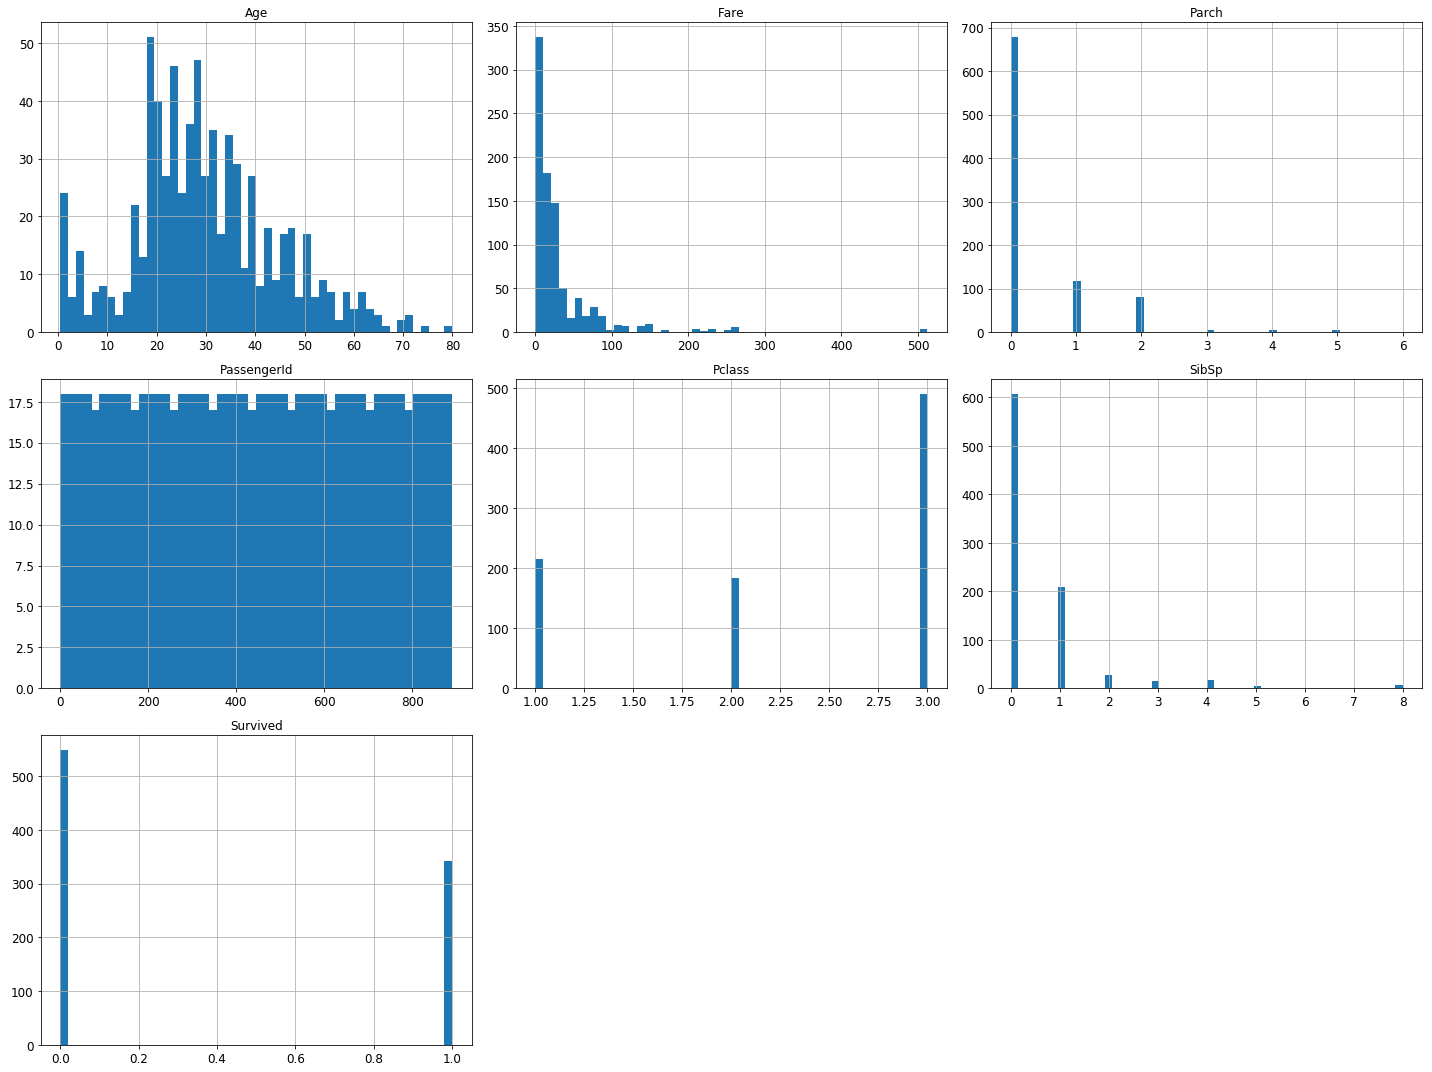

In [7]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [8]:
np.random.seed(42)

In [9]:
from sklearn.model_selection import train_test_split

#confirm shape dimensions of array are appropriate
print(data.shape)

train_set, test_set = train_test_split(data, test_size=0.2)
print(len(train_set), "train +", len(test_set), "test")

(891, 12)
712 train + 179 test


In [10]:
from zlib import crc32
import hashlib

def split_train_test_by_id(data, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, 0.25))
    return data.loc[~in_test_set], data.loc[in_test_set]

def test_set_check(identifier, hash=hashlib.md5):
    return crc32(np.int64(identifier)) & 0xffffffff < 0.25 * 2**32
#bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * 0.25

In [11]:
data_with_id = data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, "index")

In [12]:
test_set.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
11,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
16,16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [13]:
data = train_set.copy()

In [14]:
survivalData = data.loc[data['Survived'] == 1]
deadData = data.loc[data['Survived'] == 0]

In [15]:
corr_matrix = data.corr()

In [16]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.285913
Parch          0.080424
PassengerId   -0.004363
index         -0.004363
SibSp         -0.031127
Age           -0.097322
Pclass        -0.378237
Name: Survived, dtype: float64

Saving figure scatter_matrix_plot


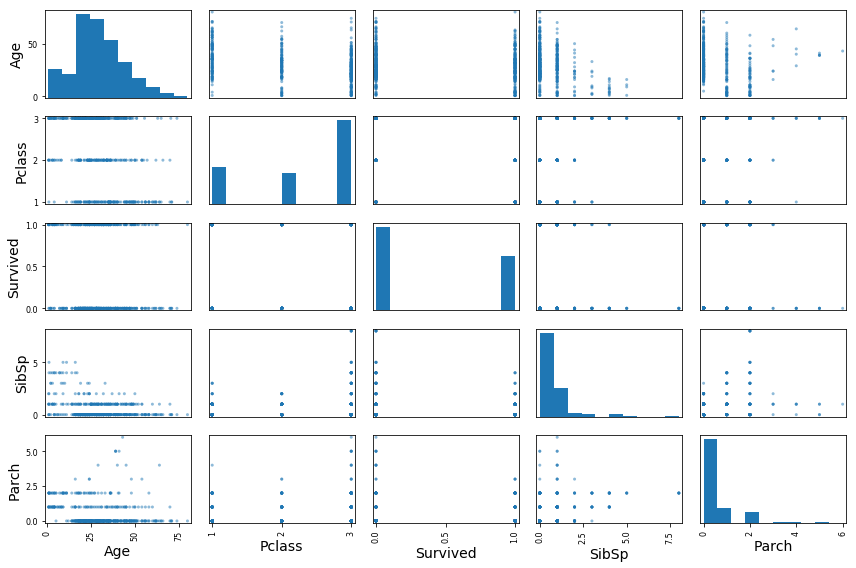

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Sex", "Pclass", "Survived", "SibSp", "Parch"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot


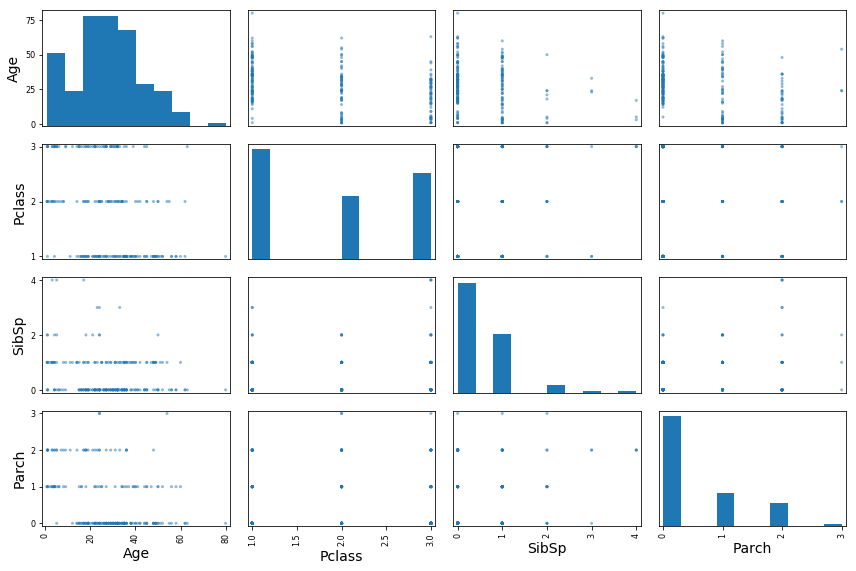

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Sex", "Pclass", "SibSp", "Parch"]
scatter_matrix(survivalData[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure Age Distribution of Survivors


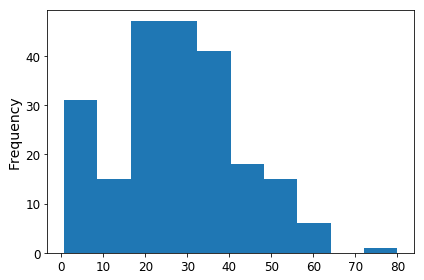

In [19]:
survivalData["Age"].plot(kind="hist")
save_fig("Age Distribution of Survivors")

Saving figure Odds of living based on Spouses and Siblings


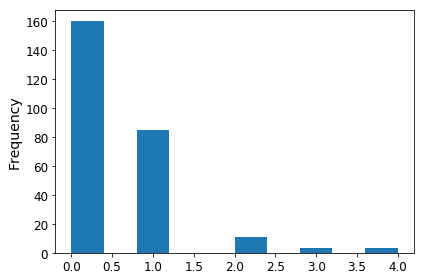

In [20]:
survivalData["SibSp"].plot(kind="hist")
save_fig("Odds of living based on Spouses and Siblings")

Saving figure Odds of living based on Parents and Children


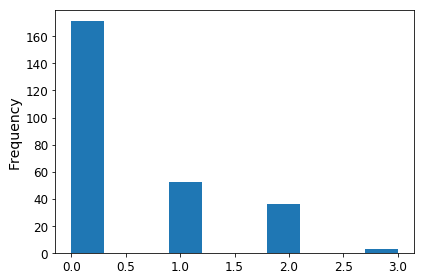

In [21]:
survivalData["Parch"].plot(kind="hist")
save_fig("Odds of living based on Parents and Children")

Saving figure Odds of living based on Pclass


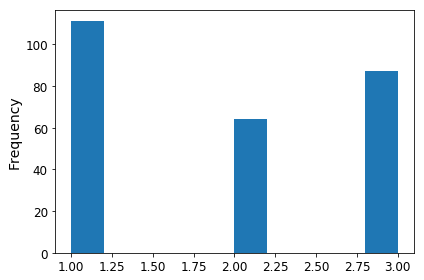

In [22]:
survivalData["Pclass"].plot(kind="hist")
save_fig("Odds of living based on Pclass")

In [26]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
sample_incomplete_rows.drop(["Cabin", "Ticket", "Embarked"], axis=1)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708


In [33]:
sample_incomplete_rows["Age"].fillna(data["Age"].mean(), inplace=True)
sample_incomplete_rows

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    from sklearn.preprocessing import Inputer as SimpleImputer
    
imputerNum = SimpleImputer()

In [44]:
data_fix = data.drop(["Name", "Sex", "Cabin", "Ticket", "Embarked"], axis=1)

In [45]:
imputerNum.fit(data_fix)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [46]:
X = imputerNum.transform(data_fix)

In [47]:
data_tr = pd.DataFrame(X, columns=data_fix.columns, index = list(data.index.values))
data_tr.loc[sample_incomplete_rows.index.values]

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
4,4.0,5.0,0.0,3.0,35.0,0.0,0.0,8.0500
7,7.0,8.0,0.0,3.0,2.0,3.0,1.0,21.0750
8,8.0,9.0,1.0,3.0,27.0,0.0,2.0,11.1333
9,9.0,10.0,1.0,2.0,14.0,1.0,0.0,30.0708


In [48]:
data_tr = pd.DataFrame(X, columns=data_fix.columns)
data_tr.head()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
3,4.0,5.0,0.0,3.0,35.0,0.0,0.0,8.0500
4,6.0,7.0,0.0,1.0,54.0,0.0,0.0,51.8625


In [49]:
data_gender = data[['Sex']]
data_gender.head(10)

,Sex
0,male
1,female
3,female
4,male
6,male
7,male
8,female
9,female
10,female
13,male


In [50]:
try: 
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder

In [51]:
ordinal_encoder = OrdinalEncoder()
data_gender_encoded = ordinal_encoder.fit_transform(data_gender)
data_gender_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [52]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [53]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder
    
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_gender)
data_cat_1hot

<668x2 sparse matrix of type '<class 'numpy.float64'>'
	with 668 stored elements in Compressed Sparse Row format>

In [54]:
data_cat_1hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [55]:
cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_gender)
data_cat_1hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [56]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [67]:
from sklearn.pipeline import Pipeline

num_attribs = list(data_fix)
cat_attribs = list(set("Sex"))

old_num_pipeline = Pipeline({
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="mean"))
    })
old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

In [68]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline),
])

TypeError: 'set' object does not support indexing

In [ ]:
old_data_prepared = old_full_pipeline.fit_transform(data)
old_data_prepared

In [ ]:
np.allclose(data_prepared,old_data_prepared)

In [57]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
survived_model.fit(train_data, train_target)

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')